In [1]:
import pandas as pd

## Для начала поисследую датасет


In [19]:
df = pd.read_csv('ha_data.csv', delimiter=';')
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [22]:
df['time'] = pd.to_datetime(df['time'])

In [23]:
print(df['time'].max())
print(df['time'].min())

2017-05-31 23:59:58
2017-01-01 00:00:03


In [3]:
df.columns

Index(['order_id', 'page_id', 'product', 'site_version', 'time', 'title',
       'user'],
      dtype='object')

### По описанию, у нас есть 2 таблицы, покупки, где page_id == NaN, клики и показы, где order_id == NaN. Поэтому для упрощения работы я буду производить операции с ними


In [4]:
df_purchase = df[df['page_id'].isna()]
df_purchase

,order_id,page_id,product,site_version,time,title,user
66,504623.0,NaN,sports_nutrition,desktop,2017-03-03 10:15:41,order,user_21
112,463510.0,NaN,sneakers,desktop,2017-02-08 21:16:48,order,user_35
113,506727.0,NaN,clothes,desktop,2017-02-10 19:12:07,order,user_35
171,95866.0,NaN,sports_nutrition,mobile,2017-02-06 10:32:36,order,user_53
185,575369.0,NaN,accessories,mobile,2017-02-10 19:18:02,order,user_55
...,...,...,...,...,...,...,...
8471069,435338.0,NaN,clothes,desktop,2017-05-29 03:53:48,order,user_4254504
8471071,321005.0,NaN,clothes,desktop,2017-05-14 22:33:58,order,user_4254505
8471095,242152.0,NaN,accessories,desktop,2017-05-10 17:22:11,order,user_4254523
8471128,770048.0,NaN,clothes,mobile,2017-05-11 23:48:35,order,user_4254547


In [5]:
df_clicks = df[df['order_id'].isna()]
df_clicks

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [6]:
print(len(df_clicks) + len(df_purchase) == len(df))
print('-' * 10)
print(df_clicks['title'].value_counts(normalize=True) * 100)

True
----------
banner_show     89.915663
banner_click    10.084337
Name: title, dtype: float64


In [7]:
agg = df_clicks.groupby('product')['title'].value_counts()
agg

product           title       
accessories       banner_show     1440954
                  banner_click     136254
clothes           banner_show     1453128
                  banner_click     220595
company           banner_show     1580238
                  banner_click     144821
sneakers          banner_show     1453029
                  banner_click     182597
sports_nutrition  banner_show     1465970
                  banner_click     144918
Name: title, dtype: int64

title           product  banner_click  banner_show  conversion_rate
0           accessories        136254      1440954         0.094558
1               clothes        220595      1453128         0.151807
2               company        144821      1580238         0.091645
3              sneakers        182597      1453029         0.125666
4      sports_nutrition        144918      1465970         0.098855


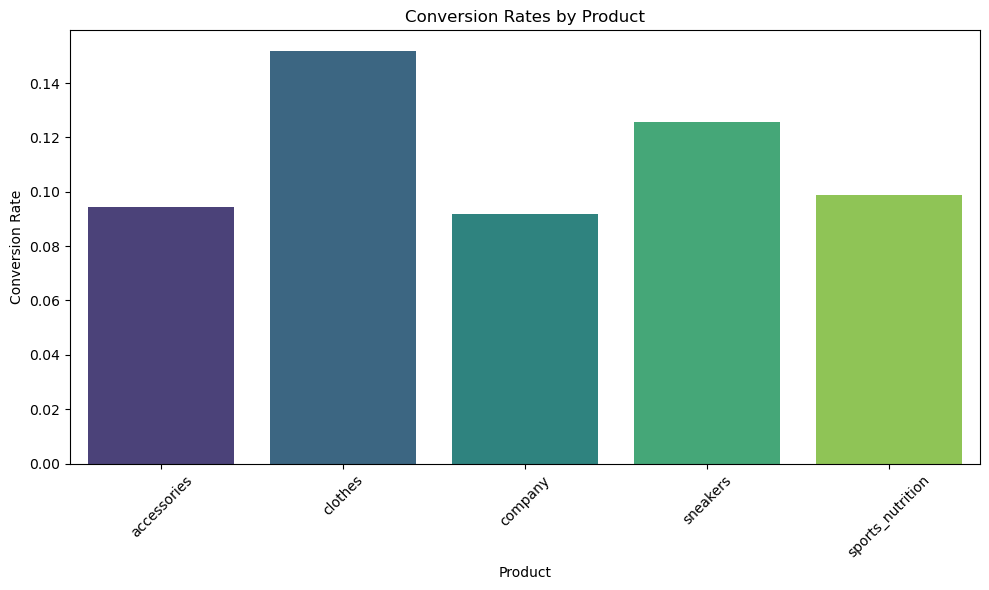

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'product': ['accessories', 'accessories', 'clothes', 'clothes', 'company', 'company', 'sneakers', 'sneakers', 'sports_nutrition', 'sports_nutrition'],
    'title': ['banner_show', 'banner_click', 'banner_show', 'banner_click', 'banner_show', 'banner_click', 'banner_show', 'banner_click', 'banner_show', 'banner_click'],
    'count': [1440954, 136254, 1453128, 220595, 1580238, 144821, 1453029, 182597, 1465970, 144918]
}

df = pd.DataFrame(data)

pivot_df = df.pivot(index='product', columns='title', values='count').reset_index()
pivot_df['conversion_rate'] = pivot_df['banner_click'] / pivot_df['banner_show']
print(pivot_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_df, x='product', y='conversion_rate', palette='viridis')
plt.title('Conversion Rates by Product')
plt.xlabel('Product')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
agg_clicked_banner = df_clicks[df_clicks['title'] == 'banner_click']
agg_clicked_banner

,order_id,page_id,product,site_version,time,title,user
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
6,NaN,18.0,sneakers,desktop,2017-01-11 09:24:43,banner_click,user_2
10,NaN,6323332.0,company,desktop,2017-01-03 08:59:15,banner_click,user_3
36,NaN,47.0,sports_nutrition,mobile,2017-02-04 03:18:45,banner_click,user_9
37,NaN,1054379.0,sneakers,mobile,2017-01-21 21:00:42,banner_click,user_9
...,...,...,...,...,...,...,...
8471178,NaN,24897038.0,company,mobile,2017-05-20 19:02:48,banner_click,user_4254584
8471189,NaN,24897172.0,clothes,mobile,2017-05-25 19:27:05,banner_click,user_4254592
8471193,NaN,24897073.0,clothes,mobile,2017-05-25 04:29:01,banner_click,user_4254594
8471203,NaN,24897115.0,accessories,mobile,2017-05-29 08:33:55,banner_click,user_4254601


### Теперь для этого всего мы можем посчитать CTR = Клики / Показы, чтобы понять, насколько эффективны показы для каждой категории

In [79]:
ctr_per_category = {agg.index.tolist()[i][0]: agg[i] / agg[i - 1] * 100 for i in range(1, len(agg), 2)}
ctr_per_category

{'accessories': 9.455818853342993,
 'clothes': 15.180699841996026,
 'company': 9.164505599789399,
 'sneakers': 12.566645263102114,
 'sports_nutrition': 9.885468324726974}

### Видно, что больше всего переходов в результате показа банера в категории одежда.

In [20]:
df_purchase['product'].value_counts(normalize=True) * 100

clothes             45.317664
sneakers            27.226783
accessories         17.911966
sports_nutrition     9.543587
Name: product, dtype: float64

In [65]:
df_new = pd.merge(df_purchase, agg_clicked_banner, how='inner', left_on=['user', 'product'], right_on=['user', 'product'], suffixes=('', '_new'))
df_new

,order_id,page_id,product,site_version,time,title,user,order_id_new,page_id_new,site_version_new,time_new,title_new
0,506727.0,NaN,clothes,desktop,2017-02-10 19:12:07,order,user_35,NaN,1687.0,desktop,2017-01-20 14:31:22,banner_click
1,551059.0,NaN,sneakers,desktop,2017-02-20 15:23:24,order,user_259,NaN,16602332.0,desktop,2017-03-17 10:18:45,banner_click
2,500534.0,NaN,clothes,desktop,2017-01-21 03:00:07,order,user_287,NaN,1270.0,desktop,2017-01-20 23:11:27,banner_click
3,49708.0,NaN,sneakers,mobile,2017-01-24 23:14:52,order,user_537,NaN,402615.0,mobile,2017-02-04 20:23:08,banner_click
4,800425.0,NaN,clothes,mobile,2017-02-28 20:09:05,order,user_537,NaN,2219.0,mobile,2017-01-30 19:05:52,banner_click
...,...,...,...,...,...,...,...,...,...,...,...,...
30507,541621.0,NaN,clothes,desktop,2017-05-17 06:25:17,order,user_4253620,NaN,24891044.0,desktop,2017-05-18 09:51:11,banner_click
30508,780221.0,NaN,sneakers,mobile,2017-04-16 18:28:27,order,user_4253925,NaN,24893097.0,mobile,2017-05-10 09:52:55,banner_click
30509,104962.0,NaN,accessories,mobile,2017-05-11 15:56:08,order,user_4254051,NaN,24896189.0,mobile,2017-05-29 06:47:48,banner_click
30510,602092.0,NaN,clothes,mobile,2017-05-27 15:27:28,order,user_4254130,NaN,24894476.0,mobile,2017-05-29 10:43:31,banner_click


In [63]:
print(df_new['user'].value_counts())
df[df['user'] == 'user_4254547']

user_120765     9
user_1934035    9
user_3176193    6
user_1705424    6
user_2969606    6
               ..
user_1289755    1
user_1289383    1
user_1289320    1
user_1289245    1
user_4254547    1
Name: user, Length: 27557, dtype: int64


,order_id,page_id,product,site_version,time,title,user
8471125,NaN,24896890.0,clothes,mobile,2017-05-22 06:09:58,banner_show,user_4254547
8471126,NaN,24896891.0,clothes,mobile,2017-05-20 16:26:39,banner_show,user_4254547
8471127,NaN,24896891.0,clothes,mobile,2017-05-20 16:27:06,banner_click,user_4254547
8471128,770048.0,NaN,clothes,mobile,2017-05-11 23:48:35,order,user_4254547


#### Выберем тех покупателей, которые перешли на банер продукта, а затем купили ту же категорию

In [76]:
agg_new = df_new.groupby('product')['user'].count() / len(df_new) * 100

### Из этого видно, что из 248722 покупок(всего), около 30512 купило товар после клика по банеру, что значит около 12.26% кликов по банеру кончается покупкой

In [109]:
buys_per_category = {agg_new.index.tolist()[i]: agg_new[i] for i in range(len(agg_new))}
print(buys_per_category)
print('-' * 10)
print(ctr_per_category)

{'accessories': 15.125196643943367, 'clothes': 48.99383848977452, 'sneakers': 27.867724174095436, 'sports_nutrition': 8.013240692186681}
----------
{'accessories': 9.455818853342993, 'clothes': 15.180699841996026, 'company': 9.164505599789399, 'sneakers': 12.566645263102114, 'sports_nutrition': 9.885468324726974}


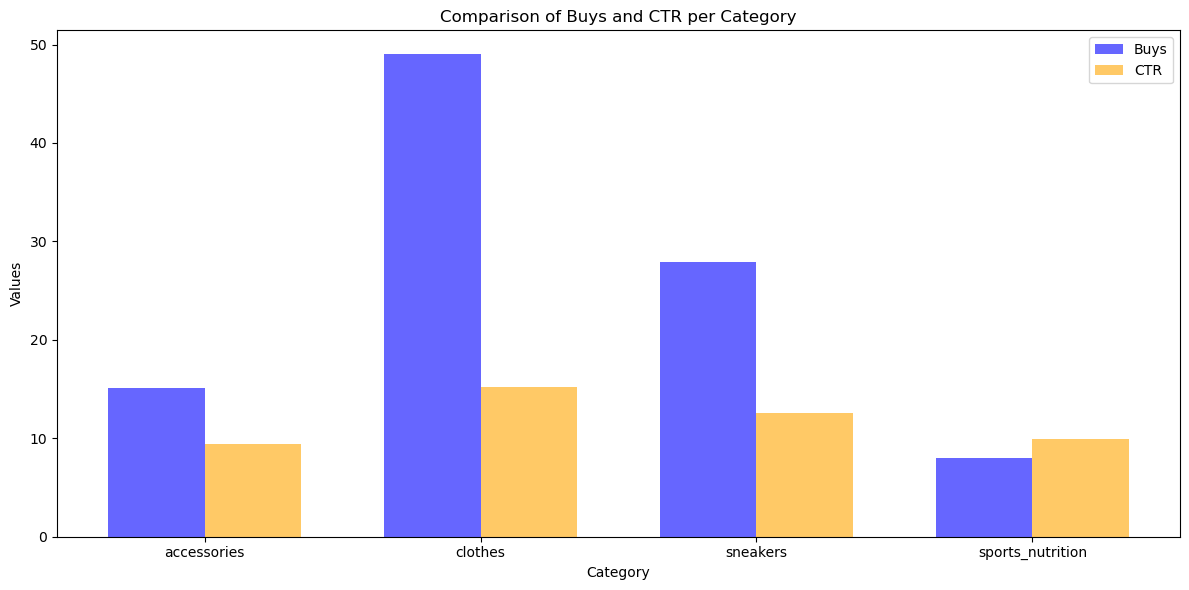

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

buys_per_category = {
    'accessories': 15.1251966643943367,
    'clothes': 48.99383848977452,
    'sneakers': 27.867724174095436,
    'sports_nutrition': 8.013240692186681
}

ctr_per_category = {
    'accessories': 9.455818853342993,
    'clothes': 15.18069984196026,
    'sneakers': 12.566645263102114,
    'sports_nutrition': 9.885468324726974
}

df_buys = pd.DataFrame(list(buys_per_category.items()), columns=['Category', 'Buys'])
df_ctr = pd.DataFrame(list(ctr_per_category.items()), columns=['Category', 'CTR'])

df = pd.merge(df_buys, df_ctr, on='Category', how='outer').fillna(0)
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df['Category']))
plt.bar(x, df['Buys'], width=bar_width, label='Buys', color='blue', alpha=0.6)

plt.bar([p + bar_width for p in x], df['CTR'], width=bar_width, label='CTR', color='orange', alpha=0.6)
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Comparison of Buys and CTR per Category')
plt.xticks([p + bar_width / 2 for p in x], df['Category'])
plt.legend()
plt.tight_layout()
plt.show()


### Но это не учитывает случаи, когда человек нажал на компанию и перешёл к их страниче, а затем купил что-либо 

In [122]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by=['user', 'time'])
df_purchase['time'] = pd.to_datetime(df_purchase['time'])

C:\Users\fktrc\AppData\Local\Temp\ipykernel_39816\3471806875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['time'] = pd.to_datetime(df_purchase['time'])


# НЕ ВЫПОЛНЯЙТЕ ЭТУ КЛЕТКУ

In [123]:
clicks_company = df[df['title'] == 'banner_click'].copy() 
clicks_company = clicks_company[clicks_company['product'] == 'company'].copy() 
time_window = pd.Timedelta(minutes=60) # окно в 1 час, для покупки по банеру

def match_clicks_with_purchases(row):
    possible_purchases = df_purchase[(df_purchase['user'] == row['user']) & 
                                   (df_purchase['time'] > row['time']) & 
                                   (df_purchase['time'] <= row['time'] + time_window)]
    
    if not possible_purchases.empty:
        return possible_purchases.iloc[0]['order_id'] 
    else:
        return None
    
clicks_company['related_order_id'] = clicks_company.apply(match_clicks_with_purchases, axis=1)

print(clicks_company[['user', 'product', 'time', 'related_order_id']])

                 user  product                time  related_order_id
260490    user_100000  company 2017-02-13 06:54:18               NaN
2284891  user_1000048  company 2017-02-02 23:51:17               NaN
2284939  user_1000074  company 2017-02-13 06:29:22               NaN
28607      user_10001  company 2017-02-17 15:20:26               NaN
2284995  user_1000110  company 2017-01-26 05:52:34               NaN
...               ...      ...                 ...               ...
2284433   user_999818  company 2017-02-08 09:46:07               NaN
260467     user_99989  company 2017-02-20 14:42:58               NaN
2284653   user_999926  company 2017-01-09 16:32:32               NaN
2284751   user_999976  company 2017-02-09 02:40:01               NaN
2284789   user_999996  company 2017-03-15 17:24:02               NaN

[144821 rows x 4 columns]


In [128]:
len(clicks_company) - clicks_company['related_order_id'].isnull().sum()

33

### С помощью этого мы узнали, что после клика на банер компании, лишь 33 человека сделали какой либо заказ в течении часа, в SQL это можно было бы довольно быстро посчитать засчёт партицирования, но в питоне это очень долго.
#### Можем сделать вывод, что банер компании не особо важен в дальнейших подсчётах и для простоты будет опущен. Но стоит заметить, что окно в час было специально выбрано, чтобы не было лишних False Positive. Так-то можно попробовать взять окно около дня, потому что некоторые клиенты кладут товары в корзину днём, а заказывают лишь вечером.

In [ ]:
agg = df_clicks.groupby('product')['title'].value_counts()
agg

product           title       
accessories       banner_show     1440954
                  banner_click     136254
clothes           banner_show     1453128
                  banner_click     220595
company           banner_show     1580238
                  banner_click     144821
sneakers          banner_show     1453029
                  banner_click     182597
sports_nutrition  banner_show     1465970
                  banner_click     144918
Name: title, dtype: int64

In [87]:
print(df_new['site_version'].value_counts())
print('-' * 10)

mobile     20116
desktop    10396
Name: site_version, dtype: int64
----------


mobile     20116
desktop    10396
Name: site_version, dtype: int64
----------


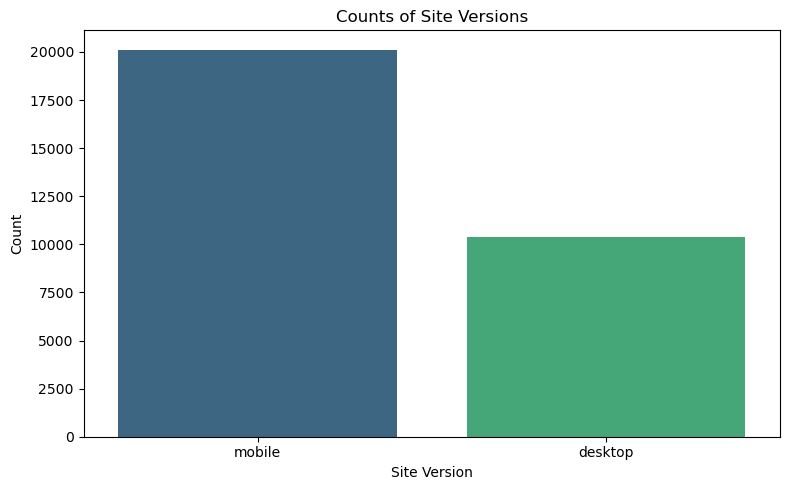

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'site_version': ['mobile'] * 20116 + ['desktop'] * 10396
}

df_new = pd.DataFrame(data)
site_counts = df_new['site_version'].value_counts()

print(site_counts)
print('-' * 10)

site_counts_df = site_counts.reset_index()
site_counts_df.columns = ['Site Version', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=site_counts_df, x='Site Version', y='Count', palette='viridis')

plt.title('Counts of Site Versions')
plt.xlabel('Site Version')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Следовательно на мобильных устройствах баннеры почти в 2 раза эффективней

### Давайте подумаем, сколько может принести замена банера на рекламу с CPC моделью.

In [99]:
daily_counts = df_clicks.groupby(pd.to_datetime(df['time']).dt.date).size()

print(daily_counts.mean())

54453.66887417219


### Прикинем, сколько в среднем стоит товар в категории, чтобы получить среднуюю цену товаров на банерах

In [107]:
buys_per_category
prices = [
    500, # примерная цена спортивных аксессуаров
    4000, # примерная цена одежды
    5000, # примерная цена обуви
    1000, # примерная цена спортивных добавок
]
mean_price = 0
for i in range(len(buys_per_category.values())):
    mean_price += buys_per_category[list(buys_per_category.keys())[i]] / 100 * prices[i]
print(mean_price)

3508.898138437336


# Подведём итоги
### На текущий момент:
#### 1. Около 12% покупок-результат перехода по банеру
#### 2. Банеры больше привлекают пользователей мобильных девайсов
#### 3. Это скорее предположение, но нужно глубже изучить категорию пищевых добавок, потому что есть вероятность, что её продажи сильно зависят от банеров(потому что это единственная категория, на которую чаще переходят, чем покупают)
### Если заменить банеры на рекламу:
#### 1. С баннерами у нас в среднем 50000 кликов в день. Для упрощения расчётов представим, что число кликов не упадёт.
### Время примерных рассчётов, по информации, найденной в интернете:
#### 50000 кликов * 40 рублей(примерная цена с яндекс.директ) = 2 000 000
#### 30000 покупок * 0.2(средняя маржа) * 3500(примерная средняя цена покупок по банеру) = 2 100 000
## Повторюсь, что рассчёты примерные, но по ним, компании скорее не выгодно продавать это место под рекламу, особенно на мобильных девайсах. 
## Но хочу заметить, что много зависит от бюджетов, выделяемых на рекламу другой компании, а также от целевой аудитории магазина, потому что от этого зависит средняя цена товара и конверсиях в клики на банеры, а также вероятность перейти по рекламе.